In [1]:
import pandas as pd
import gzip

def get_vcf_names(vcf_path):
    with gzip.open(vcf_path, "rt") as ifile:
          for line in ifile:
            if line.startswith("#CHROM"):
                  vcf_names = [x for x in line.split('\t')]
                  break
    ifile.close()
    return vcf_names


names = get_vcf_names('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr12_sorted.vcf.gz')
vcf = pd.read_csv('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr12_sorted.vcf.gz', compression='gzip', comment='#', delim_whitespace=True, header=None, names=names) #, chunksize=10000


In [12]:
vcf

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,CPCT02220079R\n
0,12,60760,.,C,CA,24.75,PASS,AC=1;AF=0.5;AN=2;BaseQRankSum=0;ClippingRankSu...,GT:AD:DP:GQ:PL,"0/1:7,5:14:62:62,0,149"
1,12,60918,.,CA,C,15.85,INDEL_LowQualityDepth,AC=1;AF=0.5;AN=2;BaseQRankSum=-1.286;ClippingR...,GT:AD:DP:GQ:PL,"0/1:27,6:33:53:53,0,664"
2,12,61176,.,A,G,238.77,PASS,AC=1;AF=0.5;AN=2;BaseQRankSum=0;ClippingRankSu...,GT:AD:DP:GQ:PL,"0/1:37,11:48:99:267,0,1386"
3,12,61700,.,C,T,1811.77,PASS,AC=1;AF=0.5;AN=2;BaseQRankSum=-1.023;ClippingR...,GT:AD:DP:GQ:PL,"0/1:19,54:73:99:1840,0,574"
4,12,61983,.,G,A,1536.77,SNP_MappingQuality,AC=2;AF=1;AN=2;BaseQRankSum=-0.386;ClippingRan...,GT:AD:DP:GQ:PL,"1/1:2,44:46:53:1565,53,0"
...,...,...,...,...,...,...,...,...,...,...
217430,12,133836499,rs140207272,A,G,2095.77,PASS,AC=2;AF=1;AN=2;DB;DP=51;ExcessHet=3.0103;FS=0;...,GT:AD:DP:GQ:PL,"1/1:0,51:51:99:2124,154,0"
217431,12,133840905,rs139789856,G,A,1636.77,PASS,AC=2;AF=1;AN=2;DB;DP=37;ExcessHet=3.0103;FS=0;...,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,37:37:99:1|1:133840905_G_A:1665,111,0"
217432,12,133840909,rs143158851,C,T,1677.77,PASS,AC=2;AF=1;AN=2;DB;DP=38;ExcessHet=3.0103;FS=0;...,GT:AD:DP:GQ:PGT:PID:PL,"1/1:0,38:38:99:1|1:133840905_G_A:1706,114,0"
217433,12,133841574,.,T,C,147.77,PASS,AC=1;AF=0.5;AN=2;BaseQRankSum=0.806;ClippingRa...,GT:AD:DP:GQ:PGT:PID:PL,"0/1:7,6:13:99:0|1:133841574_T_C:176,0,273"


In [56]:
vcf_info = vcf['INFO']
vcf_info

0         AC=2;AF=1;AN=2;DP=771;ExcessHet=3.0103;FS=0;ML...
1         AC=1;AF=0.5;AN=2;BaseQRankSum=1.04;ClippingRan...
2         AC=1;AF=0.5;AN=2;BaseQRankSum=0.377;ClippingRa...
3         AC=2;AF=1;AN=2;DP=15;ExcessHet=3.0103;FS=0;MLE...
4         AC=1;AF=0.5;AN=2;BaseQRankSum=-0.659;ClippingR...
                                ...                        
396560    AC=1;AF=0.5;AN=2;BaseQRankSum=1.28;ClippingRan...
396561    AC=1;AF=0.5;AN=2;BaseQRankSum=1.38;ClippingRan...
396562    AC=1;AF=0.5;AN=2;DP=4;ExcessHet=3.0103;FS=0;ML...
396563    AC=2;AF=1;AN=2;DP=3;ExcessHet=3.0103;FS=0;MLEA...
396564    AC=2;AF=1;AN=2;DP=14;ExcessHet=3.0103;FS=0;MLE...
Name: INFO, Length: 396565, dtype: object

In [11]:
vcf_info[0].split(";")

['AC=1',
 'AF=0.5',
 'AN=2',
 'BaseQRankSum=0',
 'ClippingRankSum=0',
 'DP=20',
 'ExcessHet=3.0103',
 'FS=0',
 'MLEAC=1',
 'MLEAF=0.5',
 'MQ=54.02',
 'MQRankSum=-2.308',
 'QD=2.06',
 'ReadPosRankSum=0.873',
 'SOR=0.33']

In [22]:
float(d[0].split("=")[1])

38.0

In [24]:
depth_coverage = {}
chromosomes = ["chr" + str(chr) for chr in range(1,23)]

In [64]:
average_depth_coverage = {}
for ch in chromosomes:
    #print('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_chr1_sorted.vcf.gz')
    names = get_vcf_names('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_' + ch + '_sorted.vcf.gz')
    vcf = pd.read_csv('/home/kate/Documents/mnm/split_chr/CPCT02220079.annotated.processed_reheader_' + ch + '_sorted.vcf.gz', compression='gzip', comment='#', delim_whitespace=True, header=None, names=names) #, chunksize=10000
    
    depth_cov = []
    vcf_info = vcf['INFO']
    #ch = chromosomes[0]
    for record in vcf_info:
        dp = [line for line in record.split(";") if 'DP' in line]
        depth_cov.append(float(dp[0].split("=")[1]))
    
    if len(depth_cov) == len(vcf_info):
        print("All of them have any coverage")
        average_depth_coverage[ch] = sum(depth_cov)/len(depth_cov)
    else:
        difference = len(vcf_info)-len(depth_cov)
        print(f"There are {difference} depth coverage values equals to 0")
        average_depth_coverage[ch] = sum(depth_cov)/(len(depth_cov)+difference)
    #print(average_depth_coverage)

All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage
All of them have any coverage


In [ ]:
average_depth_coverage_df = pd.DataFrame.from_dict(average_depth_coverage, orient='index')

In [45]:
average_depth_coverage_df

,0
chr1,48.769165
chr2,50.414162
chr3,46.948584
chr4,48.880787
chr5,43.633708
chr6,45.325102
chr7,44.794499
chr8,42.909480
chr9,48.604986
chr10,48.209144


In [71]:
average_depth_coverage_df.to_csv('/home/kate/Documents/mnm/zadanie6_out.tsv', sep = '\t')

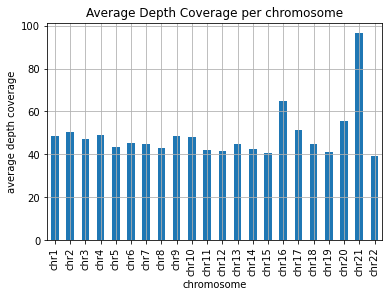

In [72]:
barplot = average_depth_coverage_df.plot.bar(legend=False, grid=True, title="Average Depth Coverage per chromosome", ylabel="average depth coverage", xlabel="chromosome")

In [73]:
barplot.figure.savefig('/home/kate/Documents/mnm/zadanie6.png')